In [1]:
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans
from sklearn.metrics import silhouette_score

seed =24

In [2]:
playtypes = ["Cut", "Handoff", "Isolation", "Misc", "Offscreen", "PnR_Ball-Handler", "PnR_Roll-Man", "Postup", "Putback", "Spotup", "Transition"]

In [3]:
players_dict = {}
for y in range(16, 24):
    print(y)
    players_advanced = pd.read_csv("../team_representation_data/nba_attack2/NBA.com_Stats/Players/General/Advanced/20"+str(y-1)+"-"+str(y)+"_NBA_Players_Advanced.csv")
    players_dict[y] = players_advanced
players_df_ = pd.concat(players_dict.values())
sns.kdeplot(players_df_["GP"], fill=True, color='blue')
plt.xlim(0, 82)
plt.xlabel("Game Played")

16


FileNotFoundError: [Errno 2] No such file or directory: '../team_representation_data/nba_attack2/NBA.com_Stats/Players/General/Advanced/2015-16_NBA_Players_Advanced.csv'

In [4]:
def f(name, y):
    if name == "Enes Freedom":
        name = "Enes Kanter"
    new_name = name + str(y)
    return new_name

In [6]:
players_by_year_dict = {}
for y in range(16, 24):
    print(y)
    players_advanced = pd.read_csv("../NBA.com_Stats/Players/General/Advanced/20"+str(y-1)+"-"+str(y)+"_NBA_Players_Advanced.csv")
    players = players_advanced[players_advanced["GP"] >= 20]
    for playtype in playtypes:
        playtype_data = pd.read_csv("../NBA.com_Stats/Players/Playtype/"+playtype+"/20"+str(y-1)+"-"+str(y)+"_NBA_"+playtype+".csv")
        playtype_data = playtype_data.rename(columns={"POSS": "POSS_"+playtype, "FREQ%": playtype+"%", "PPP": "PPP_"+playtype, "PTS": "PTS_"+playtype, "FGM": "FGM_"+playtype, "FGA": "FGA_"+playtype, "FG%": "FG%_"+playtype, "EFG%": "EFG%_"+playtype})
        print(playtype)
        players = pd.merge(players,
                           playtype_data.drop("GP", axis=1), 
                           on=["PLAYER", "TEAM"],
                           how="left")
        
    players = players[["PLAYER", 
                       "AST%", 
                       "USG%", 
                       "Cut%", 
                       "Handoff%", 
                       "Isolation%", 
                       "Misc%", 
                       "Offscreen%",
                       "PnR_Ball-Handler%", 
                       "PnR_Roll-Man%", 
                       "Postup%", 
                       "Putback%", 
                       "Spotup%", 
                       "Transition%"]]
    players["PLAYER"] = players["PLAYER"].apply(f, args=(y,))
    for i in range(len(players)):
        null_count = players.iloc[i, :].isnull().sum()
        if null_count == 0:
            continue
        playtype_percentages = players.loc[i, ["Cut%", 
                                               "Handoff%", 
                                               "Isolation%", 
                                               "Misc%", 
                                               "Offscreen%",
                                               "PnR_Ball-Handler%", 
                                               "PnR_Roll-Man%",
                                               "Postup%",
                                               "Putback%", 
                                               "Spotup%", 
                                               "Transition%"]]
        non_null_percentage = playtype_percentages.dropna()
        sum_percentage = non_null_percentage.sum()
        if sum_percentage >= 50:
            impute_value = (100-sum_percentage)/null_count
            players.iloc[i, :] = players.iloc[i, :].fillna(impute_value)
        else:
            continue
    players.dropna(inplace=True)
    players_by_year_dict[y] = players

16
Cut
Handoff
Isolation
Misc
Offscreen
PnR_Ball-Handler
PnR_Roll-Man
Postup
Putback
Spotup
Transition
17
Cut
Handoff
Isolation
Misc
Offscreen
PnR_Ball-Handler
PnR_Roll-Man
Postup
Putback
Spotup
Transition
18
Cut
Handoff
Isolation
Misc
Offscreen
PnR_Ball-Handler
PnR_Roll-Man
Postup
Putback
Spotup
Transition
19
Cut
Handoff
Isolation
Misc
Offscreen
PnR_Ball-Handler
PnR_Roll-Man
Postup
Putback
Spotup
Transition
20
Cut
Handoff
Isolation
Misc
Offscreen
PnR_Ball-Handler
PnR_Roll-Man
Postup
Putback
Spotup
Transition
21
Cut
Handoff
Isolation
Misc
Offscreen
PnR_Ball-Handler
PnR_Roll-Man
Postup
Putback
Spotup
Transition
22
Cut
Handoff
Isolation
Misc
Offscreen
PnR_Ball-Handler
PnR_Roll-Man
Postup
Putback
Spotup
Transition
23
Cut
Handoff
Isolation
Misc
Offscreen
PnR_Ball-Handler
PnR_Roll-Man
Postup
Putback
Spotup
Transition


In [7]:
players_by_year_dict[21]["PLAYER"]

0        Anthony Edwards21
1       Bojan Bogdanovic21
2        Duncan Robinson21
3           Dwayne Bacon21
4            Enes Kanter21
              ...         
428            Josh Hall21
430       Oshae Brissett21
433       Wenyen Gabriel21
434        Armoni Brooks21
437    Freddie Gillespie21
Name: PLAYER, Length: 389, dtype: object

In [8]:
players_df = pd.concat(players_by_year_dict.values())
players_df.reset_index(inplace=True, drop=True)

In [10]:
X = players_df.drop(columns=["PLAYER"], axis=1)

In [11]:
X["Handoff%+Offscreen%"] = X["Handoff%"] + X["Offscreen%"]
X.drop(columns=["Handoff%", "Offscreen%"], axis=1, inplace=True)

In [12]:
silhouette_scores = []
for k in range(2,21):
    km = KMeans(n_clusters=k, random_state=seed).fit(X)
    cluster_label = km.labels_
    silhouette_scores.append(silhouette_score(X, cluster_label))
silhouette_scores

/home/k_yamada/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/k_yamada/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/k_yamada/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/k_yamada/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

[0.30070918475274083,
 0.35144654480125304,
 0.26939861700002704,
 0.252116138200795,
 0.23728312398958515,
 0.2303573374511119,
 0.21887440335586522,
 0.21832113099902886,
 0.20812116324909777,
 0.2053615565445574,
 0.2002155124554549,
 0.1831391278071453,
 0.18120236446358662,
 0.17668049225292745,
 0.1772002937169952,
 0.17016897590020533,
 0.169784830831289,
 0.1704070304449654,
 0.16442406878150054]

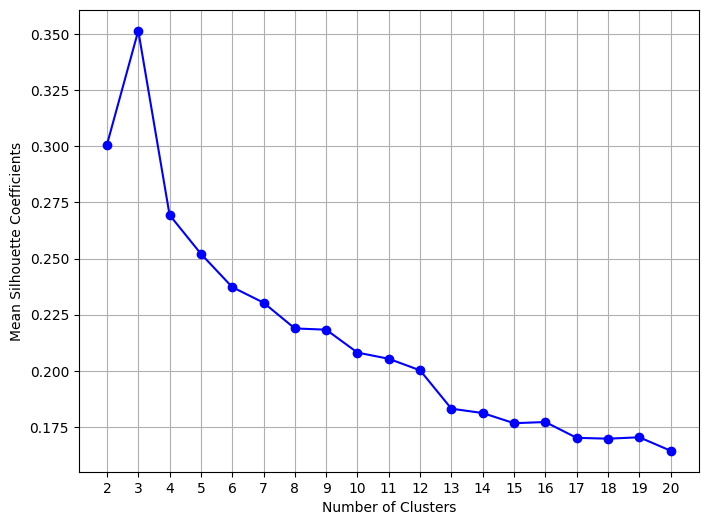

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Silhouette Coefficients')
plt.grid(True)
plt.xticks(np.arange(2, 21, step=1))
plt.show()

In [14]:
cntr, u, u0, d, jm, p, fpc = cmeans(
        X.T, c=10, m=1.2, error=0.005, maxiter=1000, init=None, seed=seed)

In [15]:
players_clusters_df = pd.concat([players_df, pd.DataFrame(u.T)], axis=1)
X_clusters_df = pd.concat([players_clusters_df["PLAYER"], X, pd.DataFrame(u.T)], axis=1)

In [16]:
k=0
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#STretchBig: STB

AST%                    9.497251
USG%                   18.192440
Cut%                   11.445546
Isolation%              3.602807
Misc%                   6.504756
PnR_Ball-Handler%       2.050075
PnR_Roll-Man%          17.630455
Postup%                 8.228729
Putback%                9.230117
Spotup%                26.750859
Transition%             9.718287
Handoff%+Offscreen%     4.822905
dtype: float64
                        PLAYER         0
2376          Christian Wood22  0.918593
2428         P.J. Washington22  0.644657
2443           Moritz Wagner22  0.976985
2450           James Johnson22  0.542902
2455      Wendell Carter Jr.22  0.948868
2472        Keita Bates-Diop22  0.762319
2489           Blake Griffin22  0.999568
2513            Jock Landale22  0.996050
2514            John Collins22  0.911511
2519             Serge Ibaka22  0.998613
2523          Xavier Tillman22  0.889216
2530       Derrick Jones Jr.22  0.980139
2532             Jalen Smith22  0.999565
2545  Jeremiah 

In [17]:
k=1
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#ISolationAttacker: ISA 

AST%                   23.414737
USG%                   27.036316
Cut%                    3.990151
Isolation%             13.295380
Misc%                   4.857686
PnR_Ball-Handler%      25.445263
PnR_Roll-Man%           1.778133
Postup%                 5.661116
Putback%                2.457344
Spotup%                13.232749
Transition%            16.405140
Handoff%+Offscreen%    12.845986
dtype: float64
                         PLAYER         1
2067              Paul George21  0.993194
2084            Kawhi Leonard21  0.998734
2115             Jamal Murray21  0.964310
2120              CJ McCollum21  0.967520
2121             Caris LeVert21  0.980765
2147             LeBron James21  0.910072
2152           Gordon Hayward21  0.839153
2205             Kevin Durant21  0.971928
2212           Victor Oladipo21  0.735680
2279        Russell Westbrook22  0.919982
2295             Jayson Tatum22  0.999375
2296             Jordan Poole22  0.965375
2334          Anthony Edwards22  0.998392
2

In [18]:
k=2
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#PostUpBig: PUB

AST%                   14.337198
USG%                   23.417391
Cut%                   12.043323
Isolation%              5.642687
Misc%                   7.137775
PnR_Ball-Handler%       1.403508
PnR_Roll-Man%          17.804831
Postup%                23.964734
Putback%               10.355255
Spotup%                11.252163
Transition%             7.296519
Handoff%+Offscreen%     3.091959
dtype: float64
                    PLAYER         2
1777    Boban Marjanovic20  0.980694
1804       Deandre Ayton20  0.981172
1818  Karl-Anthony Towns20  0.988462
1832   Willy Hernangomez20  0.722976
1833       Jahlil Okafor20  0.999873
1855     Zion Williamson20  0.990194
1876        Nikola Jokic21  0.968574
1883         Robin Lopez21  0.883372
1893      Nikola Vucevic21  0.992838
1898     Carmelo Anthony21  0.513545
1901       Deandre Ayton21  0.924086
1908    Montrezl Harrell21  0.922791
1956         Bam Adebayo21  0.873008
1983    Domantas Sabonis21  0.994337
1984   Jonas Valanciunas21  0.9938

In [19]:
k=3
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#SecondaryBall-Handler: SBH

AST%                   22.121408
USG%                   18.575211
Cut%                    2.854218
Isolation%              6.665281
Misc%                   5.607426
PnR_Ball-Handler%      34.978028
PnR_Roll-Man%           1.680415
Postup%                 1.683213
Putback%                2.073490
Spotup%                22.442254
Transition%            13.250513
Handoff%+Offscreen%     8.766571
dtype: float64
                     PLAYER         3
2564            Ty Jerome22  0.929726
2575        Norman Powell22  0.657279
2578        Malachi Flynn22  0.993773
2588           Trey Burke22  0.974536
2598        Miles McBride22  0.786817
2603          Rajon Rondo22  0.754686
2607     Dennis Smith Jr.22  0.579388
2611            Saben Lee22  0.975191
2613      Brandon Goodwin22  0.969702
2627         Keifer Sykes22  0.925046
2644         Derrick Rose22  0.968519
2646      Justin Robinson22  0.929494
2649     Brandon Williams22  0.770907
2650          Daishen Nix22  0.892777
2651       Kira Lew

In [20]:
k=4
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#TRansitionAttacker: TRA

AST%                    8.934132
USG%                   15.802096
Cut%                    9.176066
Isolation%              3.678913
Misc%                   5.023137
PnR_Ball-Handler%       6.895363
PnR_Roll-Man%           2.991570
Postup%                 3.298616
Putback%                5.821054
Spotup%                32.680838
Transition%            21.760878
Handoff%+Offscreen%     8.666079
dtype: float64
                          PLAYER         4
2369           Carmelo Anthony22  0.666476
2370             Darius Bazley22  0.937408
2372             Kyle Anderson22  0.991208
2393               Isaac Okoro22  0.999032
2397                Josh Green22  0.989830
2399            Oshae Brissett22  0.868273
2410          Matisse Thybulle22  0.752174
2412            Troy Brown Jr.22  0.572122
2442             Lamar Stevens22  0.999731
2481            Hamidou Diallo22  0.890267
2507             Naji Marshall22  0.957276
2520           De'Andre Hunter22  0.876716
2535           Rodney McGruder

In [21]:
k=5
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#PrimaryBall-Handler: PBH

AST%                   31.965106
USG%                   24.774468
Cut%                    1.829014
Isolation%             11.140396
Misc%                   5.108494
PnR_Ball-Handler%      44.106809
PnR_Roll-Man%           0.681582
Postup%                 1.424631
Putback%                1.478390
Spotup%                12.610213
Transition%            13.927779
Handoff%+Offscreen%     7.676948
dtype: float64
                         PLAYER         5
2118                Saben Lee21  0.976145
2122             Cole Anthony21  0.958483
2155             James Harden21  0.734091
2158             Kemba Walker21  0.954653
2162         D'Angelo Russell21  0.995674
2179                John Wall21  0.899719
2208  Shai Gilgeous-Alexander21  0.995050
2235         Kevin Porter Jr.21  0.974223
2236            Killian Hayes21  0.941024
2245         Dennis Smith Jr.21  0.623615
2250            Chris Chiozza21  0.667931
2289        Tyrese Haliburton22  0.987367
2290            DeMar DeRozan22  0.855921
2

In [22]:
k=6
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#SpotUpShooter: SUS

AST%                    7.792623
USG%                   13.884699
Cut%                    6.108695
Isolation%              3.182513
Misc%                   5.087883
PnR_Ball-Handler%       4.918967
PnR_Roll-Man%           5.575349
Postup%                 3.646130
Putback%                4.438621
Spotup%                45.535246
Transition%            12.281164
Handoff%+Offscreen%     9.230623
dtype: float64
                          PLAYER         6
2718               Isaac Okoro23  0.569159
2722                 Josh Hart23  0.571872
2726             Royce O'Neale23  0.992789
2728            Troy Brown Jr.23  0.999235
2735               P.J. Tucker23  0.913404
2740             Corey Kispert23  0.959636
2741                Damion Lee23  0.993853
2746                Joe Harris23  0.985395
2749                Trey Lyles23  0.999767
2751             Aaron Nesmith23  0.995029
2756                Isaiah Joe23  0.950505
2761                AJ Griffin23  0.868523
2766               Josh Okogie

In [23]:
k=7
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#Roll&CutBig: RCB

AST%                    8.053506
USG%                   15.194026
Cut%                   24.720519
Isolation%              1.702544
Misc%                  10.196222
PnR_Ball-Handler%       1.000639
PnR_Roll-Man%          22.367734
Postup%                 6.799700
Putback%               18.605599
Spotup%                 5.739622
Transition%             6.805254
Handoff%+Offscreen%     2.062166
dtype: float64
                     PLAYER         7
2590         Jericho Sims22  0.999823
2599          Moses Brown22  0.999107
2600             Alex Len22  0.999670
2601       Derrick Favors22  0.898958
2612      Bismack Biyombo22  0.999609
2615       Isaiah Jackson22  0.994524
2619          Enes Kanter22  0.932927
2622      Marquese Chriss22  0.990470
2625       Day'Ron Sharpe22  0.998023
2629           Luka Garza22  0.917337
2641          Cody Zeller22  0.999015
2645       Wenyen Gabriel22  0.505349
2648         Nerlens Noel22  0.999585
2656         Olivier Sarr22  0.998756
2659           Tyle

In [24]:
k=8
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#OffScreenShooter: OSS

AST%                    9.009740
USG%                   17.961039
Cut%                    4.485945
Isolation%              2.501691
Misc%                   3.993725
PnR_Ball-Handler%       9.432255
PnR_Roll-Man%           1.673346
Postup%                 1.662481
Putback%                1.860273
Spotup%                28.066883
Transition%            14.578064
Handoff%+Offscreen%    31.716766
dtype: float64
                   PLAYER         8
1498    Duncan Robinson20  0.999521
1506     Furkan Korkmaz20  0.859950
1532     Doug McDermott20  0.997474
1536         Joe Harris20  0.999984
1540      Terrence Ross20  0.983906
1563    Wesley Matthews20  0.818671
1576  Langston Galloway20  0.999771
1599   Bojan Bogdanovic20  0.873926
1600        Bryn Forbes20  0.900868
1645          JJ Redick20  0.998323
1672        Kyle Korver20  0.999874
1692    Marco Belinelli20  0.993474
1698      E'Twaun Moore20  0.881577
1699        Gary Harris20  0.999808
1708     Svi Mykhailiuk20  0.978193
1723      Dav

In [25]:
k=9
print(np.mean(X_clusters_df.iloc[:, 1:13][X_clusters_df[k]>0.5], axis=0))
print(X_clusters_df[X_clusters_df[k]>0.5][-60:][["PLAYER", k]])
print("count:",len(X_clusters_df[X_clusters_df[k]>0.5]))
#WingWithHandle: WWH

AST%                   13.507925
USG%                   18.883916
Cut%                    3.902078
Isolation%              5.975034
Misc%                   4.580376
PnR_Ball-Handler%      21.108159
PnR_Roll-Man%           1.991218
Postup%                 2.846257
Putback%                2.697651
Spotup%                28.398601
Transition%            15.620257
Handoff%+Offscreen%    12.888528
dtype: float64
                     PLAYER         9
2660        Mikal Bridges23  0.854702
2661        Derrick White23  0.986561
2671         Jevon Carter23  0.998967
2675          Bruce Brown23  0.988013
2677      Davion Mitchell23  0.997449
2684       Shaedon Sharpe23  0.936052
2697   Bennedict Mathurin23  0.942568
2706    De'Anthony Melton23  0.852566
2716          Deni Avdija23  0.985266
2733       Jalen Williams23  0.523531
2738         Caris LeVert23  0.918094
2754        Dillon Brooks23  0.999720
2758           RJ Barrett23  0.996662
2762     Donte DiVincenzo23  0.814198
2788        Kyle An

In [26]:
cluster_names = ["STB",
                 "ISA",
                 "PUB",
                 "SBH",
                 "TRA", 
                 "PBH",
                 "SUS",
                 "RCB",
                 "OSS",
                 "WWH"]

In [27]:
clusters = pd.DataFrame(u.T, columns=cluster_names)

In [28]:
players_clusters_df = pd.concat([players_df, clusters], axis=1)

In [29]:
with open('../pickle_files/clustering2.pkl', 'wb') as f:
    pickle.dump(players_clusters_df, f)
    pickle.dump(cluster_names, f)

In [30]:
max_membership = np.max(clusters, axis=1)

In [31]:
players_clusters_df["max_membership"] = max_membership

In [32]:
sum([p > 0.5 for p in max_membership])/len(max_membership)

0.9655850540806293

Text(0, 0.5, '')

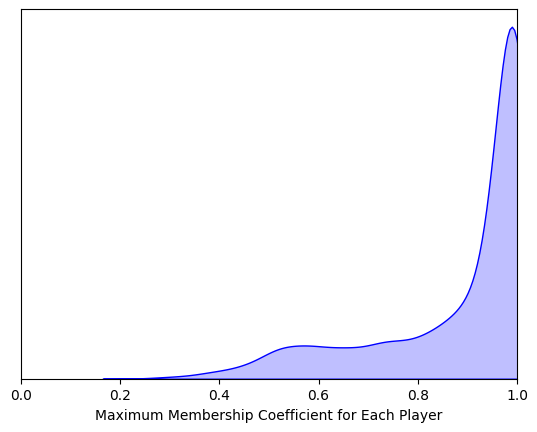

In [33]:
sns.kdeplot(max_membership, fill=True, color='blue')
plt.xlim(0, 1)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.xlabel("Maximum Membership Coefficient for Each Player")
plt.ylabel("")

In [34]:
from basketball_reference_web_scraper import client
stats_2023 = client.players_season_totals(season_end_year=2023)

In [35]:
player_name_tmp = 0
GP_tmp = 0
PPP_df = pd.DataFrame(columns=["PLAYER", "PPP"])
for i, player_stats in enumerate(stats_2023):
    if player_stats["name"] == player_name_tmp:
        if GP_tmp + player_stats["games_played"] < 20:
            continue
        PTS = PTS_tmp + player_stats["points"]
        FGA = FGA_tmp + player_stats["attempted_field_goals"]
        FTA = FTA_tmp + player_stats["attempted_free_throws"]
        TOV = TOV_tmp + player_stats["turnovers"]
        PPP = PTS/(FGA + FTA*0.44 + TOV)
        PPP_df.loc[i-1, "PPP"] = PPP
        continue
    player_name_tmp, GP_tmp, PTS_tmp, FGA_tmp, FTA_tmp, TOV_tmp = player_stats["name"], player_stats["games_played"], player_stats["points"], player_stats["attempted_field_goals"], player_stats["attempted_free_throws"], player_stats["turnovers"]
    if GP_tmp < 20:
        continue
    PPP_df.loc[i, "PLAYER"] = player_stats["name"]+"23"
    PPP = player_stats["points"]/(player_stats["attempted_field_goals"]+player_stats["attempted_free_throws"]*0.44+player_stats["turnovers"])
    PPP_df.loc[i, "PPP"] = PPP
PPP_df.dropna()
PPP_df

,PLAYER,PPP
0,Precious Achiuwa23,0.981529
1,Steven Adams23,0.905306
2,Bam Adebayo23,1.03459
3,Ochai Agbaji23,1.021077
4,Santi Aldama23,1.073478
...,...,...
601,Delon Wright23,1.021029
602,McKinley Wright IV23,0.909381
604,Thaddeus Young23,0.954502
605,Trae Young23,0.971002


In [36]:
PPP_df[PPP_df["PPP"]>1.1].sort_values("PPP", ascending=True)

,PLAYER,PPP
382,Donovan Mitchell23,1.102115
35,Keita Bates-Diop23,1.102215
206,Josh Green23,1.102229
538,Xavier Tillman Sr.23,1.102374
558,Moritz Wagner23,1.102779
...,...,...
302,Walker Kessler23,1.25286
178,Daniel Gafford23,1.253824
592,Robert Williams23,1.25653
509,Jericho Sims23,1.262053


In [37]:
players_clusters_df["CLUSTER"] = clusters.idxmax(axis=1)
players_clusters_df

,PLAYER,AST%,USG%,Cut%,Handoff%,Isolation%,Misc%,Offscreen%,PnR_Ball-Handler%,PnR_Roll-Man%,...,PUB,SBH,TRA,PBH,SUS,RCB,OSS,WWH,max_membership,CLUSTER
0,Al Horford16,16.5,20.2,10.700000,0.300000,3.300000,4.700000,3.500000,0.300000,24.700000,...,2.893473e-02,4.317609e-06,0.000190,4.484941e-07,0.000070,2.874524e-04,1.105118e-05,0.000046,0.970446,STB
1,Al-Farouq Aminu16,8.7,16.6,5.100000,6.000000,3.800000,4.400000,5.000000,8.500000,4.000000,...,3.947477e-08,2.973931e-07,0.980917,5.211013e-09,0.018778,1.143579e-08,1.376914e-05,0.000277,0.980917,TRA
2,Bismack Biyombo16,2.5,11.4,34.000000,0.320000,0.320000,15.400000,0.320000,0.320000,19.300000,...,8.612039e-05,6.241244e-07,0.000004,1.766819e-07,0.000001,9.998424e-01,9.924292e-07,0.000002,0.999842,RCB
3,Corey Brewer16,10.2,17.2,4.900000,6.700000,2.000000,6.100000,6.500000,4.600000,0.600000,...,7.210711e-06,4.178198e-05,0.990050,1.838258e-06,0.003256,2.673200e-06,2.167483e-03,0.004138,0.990050,TRA
4,Enes Kanter16,3.2,22.9,16.700000,0.166667,1.500000,6.500000,0.166667,0.166667,20.200000,...,4.176840e-01,7.235618e-06,0.000079,1.702698e-06,0.000017,5.769033e-01,1.297236e-05,0.000030,0.576903,RCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,Trent Forrest23,18.6,11.6,4.755556,4.755556,4.755556,4.755556,4.755556,36.400000,4.755556,...,3.749052e-06,9.922737e-01,0.000031,1.520511e-03,0.000010,1.396789e-06,2.175097e-05,0.004548,0.992274,SBH
3047,Brandon Boston Jr.23,12.9,23.7,2.183333,2.183333,6.800000,7.400000,2.183333,27.700000,2.183333,...,1.375385e-05,3.229750e-01,0.002297,8.995454e-04,0.000097,3.166919e-06,1.378545e-04,0.624165,0.624165,WWH
3048,Gary Payton II23,10.6,10.1,30.300000,5.066667,5.066667,5.066667,5.066667,5.066667,5.066667,...,7.643506e-02,7.525269e-03,0.135994,1.331614e-03,0.006201,5.600293e-01,2.136417e-02,0.036093,0.560029,RCB
3049,Kris Dunn23,31.5,19.5,3.933333,7.300000,14.200000,5.100000,3.933333,31.600000,3.933333,...,2.476507e-05,5.703006e-01,0.000061,1.767091e-01,0.000019,4.950988e-06,6.468701e-05,0.004601,0.570301,SBH


In [38]:
player_23 = players_clusters_df[players_clusters_df["PLAYER"].str.endswith('23')]
player_23

,PLAYER,AST%,USG%,Cut%,Handoff%,Isolation%,Misc%,Offscreen%,PnR_Ball-Handler%,PnR_Roll-Man%,...,PUB,SBH,TRA,PBH,SUS,RCB,OSS,WWH,max_membership,CLUSTER
2660,Mikal Bridges23,14.1,22.3,1.900000,7.300000,8.600000,3.800000,6.500000,27.300000,1.900000,...,6.916431e-06,1.210416e-01,0.000197,1.791714e-04,4.235719e-05,7.487538e-07,0.000269,0.854702,0.854702,WWH
2661,Derrick White23,19.1,17.4,3.100000,3.700000,3.300000,3.800000,3.700000,23.500000,1.800000,...,1.613727e-06,1.083095e-02,0.001717,1.625209e-05,5.325228e-04,2.798700e-07,0.000064,0.986561,0.986561,WWH
2662,Harrison Barnes23,6.3,16.8,7.200000,8.900000,5.800000,5.600000,1.600000,5.600000,1.100000,...,1.917448e-07,3.672382e-07,0.994903,8.187432e-09,4.759690e-03,4.008422e-08,0.000030,0.000251,0.994903,TRA
2663,Isaiah Hartenstein23,8.3,10.7,25.500000,1.360000,1.360000,10.600000,1.360000,1.360000,15.800000,...,2.117067e-04,1.508586e-06,0.000015,2.916879e-07,4.766771e-06,9.993022e-01,0.000003,0.000005,0.999302,RCB
2664,Jordan Poole23,23.4,28.2,4.000000,10.400000,6.900000,5.900000,9.500000,27.700000,0.700000,...,4.169944e-07,3.250933e-03,0.000004,3.882718e-04,3.892641e-07,8.395616e-08,0.000018,0.000590,0.995747,ISA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,Trent Forrest23,18.6,11.6,4.755556,4.755556,4.755556,4.755556,4.755556,36.400000,4.755556,...,3.749052e-06,9.922737e-01,0.000031,1.520511e-03,9.701049e-06,1.396789e-06,0.000022,0.004548,0.992274,SBH
3047,Brandon Boston Jr.23,12.9,23.7,2.183333,2.183333,6.800000,7.400000,2.183333,27.700000,2.183333,...,1.375385e-05,3.229750e-01,0.002297,8.995454e-04,9.689552e-05,3.166919e-06,0.000138,0.624165,0.624165,WWH
3048,Gary Payton II23,10.6,10.1,30.300000,5.066667,5.066667,5.066667,5.066667,5.066667,5.066667,...,7.643506e-02,7.525269e-03,0.135994,1.331614e-03,6.201415e-03,5.600293e-01,0.021364,0.036093,0.560029,RCB
3049,Kris Dunn23,31.5,19.5,3.933333,7.300000,14.200000,5.100000,3.933333,31.600000,3.933333,...,2.476507e-05,5.703006e-01,0.000061,1.767091e-01,1.915132e-05,4.950988e-06,0.000065,0.004601,0.570301,SBH


In [39]:
player_PPP_23_left = pd.merge(player_23, PPP_df, on="PLAYER", how="left")
player_PPP_23_left[player_PPP_23_left["PPP"].isnull()]

,PLAYER,AST%,USG%,Cut%,Handoff%,Isolation%,Misc%,Offscreen%,PnR_Ball-Handler%,PnR_Roll-Man%,...,SBH,TRA,PBH,SUS,RCB,OSS,WWH,max_membership,CLUSTER,PPP
5,Kenyon Martin Jr.23,7.9,16.0,17.300000,1.100000,1.875000,4.700000,1.875000,1.875000,11.700000,...,1.430591e-05,3.513567e-01,7.059481e-07,7.689362e-03,2.016671e-04,1.053166e-04,6.315001e-04,0.639848,STB,NaN
7,Nikola Vucevic23,14.6,21.8,9.100000,1.000000,0.700000,5.000000,1.900000,2.200000,28.500000,...,6.033538e-06,5.685356e-05,9.639516e-07,2.706994e-05,9.432594e-04,9.351778e-06,3.109900e-05,0.967598,PUB,NaN
32,Jonas Valanciunas23,10.8,22.9,14.400000,-0.166667,1.300000,6.600000,-0.166667,-0.166667,18.300000,...,1.870978e-07,1.328816e-06,4.896930e-08,3.683885e-07,3.639549e-04,2.418090e-07,6.494448e-07,0.999557,PUB,NaN
130,Nikola Jokic23,41.2,26.3,10.400000,2.400000,4.500000,9.000000,5.400000,5.100000,11.200000,...,6.417896e-03,4.532224e-03,3.923652e-03,1.269434e-03,9.739119e-03,2.167074e-03,7.865259e-03,0.888128,PUB,NaN
156,O.G. Anunoby23,8.0,19.2,4.800000,4.400000,6.200000,3.800000,4.200000,10.300000,9.400000,...,4.835490e-05,9.063119e-01,7.617202e-07,1.704853e-02,2.823730e-06,4.241309e-04,5.556620e-02,0.906312,TRA,NaN
162,Dennis Schroder23,20.2,18.3,1.400000,4.200000,11.300000,5.700000,3.775000,39.000000,1.100000,...,9.916253e-01,4.807929e-06,5.819184e-03,1.845339e-06,1.799380e-07,3.674385e-06,7.903073e-04,0.991625,SBH,NaN
168,Luka Doncic23,40.8,36.8,1.000000,4.500000,23.800000,4.400000,2.200000,33.900000,4.200000,...,2.271586e-02,1.886364e-04,6.628235e-01,6.448311e-05,7.501046e-05,1.846231e-04,2.157648e-03,0.662823,PBH,NaN
174,Kristaps Porzingis23,12.5,27.2,9.000000,1.500000,5.600000,7.400000,7.300000,1.000000,14.000000,...,2.754412e-05,2.471759e-03,2.335633e-06,4.826234e-04,2.514841e-04,2.178722e-04,7.081172e-04,0.792247,STB,NaN
176,Marcus Morris Sr.23,9.0,17.6,1.500000,4.500000,12.700000,4.100000,4.000000,4.100000,3.000000,...,3.377063e-05,2.868283e-02,1.287669e-06,9.653529e-01,2.397636e-06,4.766146e-04,3.295457e-03,0.965353,SUS,NaN
195,Kevin Knox II23,5.3,17.5,5.928571,9.300000,5.928571,5.928571,8.200000,7.100000,5.928571,...,2.182584e-04,1.744725e-01,5.645824e-06,5.961112e-01,4.107491e-05,1.151109e-01,6.115612e-02,0.596111,SUS,NaN


In [40]:
player_PPP_23_outer = pd.merge(player_23, PPP_df, on = "PLAYER", how="outer")

In [41]:
player_PPP_23_outer[player_PPP_23_outer["AST%"].isnull()]["PLAYER"].dropna()[:30]

391    Thanasis Antetokounmpo23
392                OG Anunoby23
400            Udoka Azubuike23
401       Patrick Baldwin Jr.23
402                  Mo Bamba23
403             Darius Bazley23
404             Dāvis Bertāns23
405                Khem Birch23
406         Bogdan Bogdanović23
407          Bojan Bogdanović23
408               Moses Brown23
409             Vlatko Čančar23
410          Kennedy Chandler23
411              Max Christie23
412            Dewayne Dedmon23
413       Matthew Dellavedova23
414            Moussa Diabaté23
415            Mamadi Diakite23
416               Luka Dončić23
417               Jeff Dowtin23
418              Goran Dragić23
419            Bruno Fernando23
420                Luka Garza23
421                A.J. Green23
422       Juancho Hernangómez23
423         Willy Hernangómez23
424               George Hill23
425            Justin Holiday23
426            Richaun Holmes23
427            Justin Jackson23
Name: PLAYER, dtype: object

In [42]:
player_PPP_23_outer[player_PPP_23_outer["AST%"].isnull()]["PLAYER"].dropna()[30:]

428             Nikola Jokić23
429           Frank Kaminsky23
430            Nathan Knight23
431               Kevin Knox23
432               Vit Krejci23
433                 Alex Len23
434       Kenneth Lofton Jr.23
435             Théo Maledon23
436         Boban Marjanović23
437                KJ Martin23
438         Garrison Mathews23
439             JaVale McGee23
440        Wendell Moore Jr.23
441            Marcus Morris23
442          Markieff Morris23
443             Jusuf Nurkić23
444                KZ Okpala23
445              Theo Pinson23
446       Kristaps Porziņģis23
447               Davon Reed23
448              Isaiah Roby23
449              Dario Šarić23
450          Dennis Schröder23
451             Terry Taylor23
452           Garrett Temple23
453              Dalen Terry23
454       Xavier Tillman Sr.23
455    Juan Toscano-Anderson23
456        Jonas Valančiūnas23
457              Noah Vonleh23
458           Nikola Vučević23
459              T.J. Warren23
460     

In [43]:
player_23.replace('Nikola Vucevic23', "Nikola Vučević23", inplace=True)
player_23.replace('Jonas Valanciunas23', "Jonas Valančiūnas23", inplace=True)
player_23.replace('Alperen Sengun23', "Alperen Şengün23", inplace=True)
player_23.replace('Nikola Jokic23', "Nikola Jokić23", inplace=True)
player_23.replace('O.G. Anunoby23', "OG Anunoby23", inplace=True)
player_23.replace('Dennis Schroder23', "Dennis Schröder23", inplace=True)
player_23.replace('Luka Doncic23', "Luka Dončić23", inplace=True)
player_23.replace('Kristaps Porzingis23', "Kristaps Porziņģis23", inplace=True)
player_23.replace('Marcus Morris Sr.23', "Marcus Morris23", inplace=True)
player_23.replace('Kevin Knox II23', "Kevin Knox23", inplace=True)
player_23.replace('Xavier Tillman23', "Xavier Tillman Sr.23", inplace=True)
player_23.replace('Vlatko Cancar23', "Vlatko Čančar23", inplace=True)
player_23.replace('Bojan Bogdanovic23', "Bojan Bogdanović23", inplace=True)
player_23.replace('Goran Dragic23', "Goran Dragić23", inplace=True)
player_23.replace('Dario Saric23', "Dario Šarić23", inplace=True)
player_23.replace('Bogdan Bogdanovic23', "Bogdan Bogdanović23", inplace=True)
player_23.replace('Jusuf Nurkic23', "Jusuf Nurkić23", inplace=True)
player_23.replace('Davis Bertans23', "Dāvis Bertāns23", inplace=True)
player_23.replace('Theo Maledon23', "Théo Maledon23", inplace=True)
player_23.replace('Juancho Hernangomez23', "Juancho Hernangómez23", inplace=True)
player_23.replace('Willy Hernangomez23', "Willy Hernangómez23", inplace=True)
player_23.replace('Robert Williams III23', "Robert Williams23", inplace=True)

/tmp/ipykernel_1889276/1941705472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_23.replace('Nikola Vucevic23', "Nikola Vučević23", inplace=True)
/tmp/ipykernel_1889276/1941705472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_23.replace('Jonas Valanciunas23', "Jonas Valančiūnas23", inplace=True)
/tmp/ipykernel_1889276/1941705472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_23.replace('Alperen Seng

In [44]:
player_PPP_23 = pd.merge(player_23, PPP_df)
player_PPP_23

,PLAYER,AST%,USG%,Cut%,Handoff%,Isolation%,Misc%,Offscreen%,PnR_Ball-Handler%,PnR_Roll-Man%,...,SBH,TRA,PBH,SUS,RCB,OSS,WWH,max_membership,CLUSTER,PPP
0,Mikal Bridges23,14.1,22.3,1.900000,7.300000,8.600000,3.800000,6.500000,27.300000,1.900000,...,1.210416e-01,0.000197,1.791714e-04,4.235719e-05,7.487538e-07,0.000269,0.854702,0.854702,WWH,1.078538
1,Derrick White23,19.1,17.4,3.100000,3.700000,3.300000,3.800000,3.700000,23.500000,1.800000,...,1.083095e-02,0.001717,1.625209e-05,5.325228e-04,2.798700e-07,0.000064,0.986561,0.986561,WWH,1.084823
2,Harrison Barnes23,6.3,16.8,7.200000,8.900000,5.800000,5.600000,1.600000,5.600000,1.100000,...,3.672382e-07,0.994903,8.187432e-09,4.759690e-03,4.008422e-08,0.000030,0.000251,0.994903,TRA,1.16178
3,Isaiah Hartenstein23,8.3,10.7,25.500000,1.360000,1.360000,10.600000,1.360000,1.360000,15.800000,...,1.508586e-06,0.000015,2.916879e-07,4.766771e-06,9.993022e-01,0.000003,0.000005,0.999302,RCB,0.957005
4,Jordan Poole23,23.4,28.2,4.000000,10.400000,6.900000,5.900000,9.500000,27.700000,0.700000,...,3.250933e-03,0.000004,3.882718e-04,3.892641e-07,8.395616e-08,0.000018,0.000590,0.995747,ISA,0.978045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Kira Lewis Jr.23,13.7,19.2,3.514286,12.600000,3.514286,3.514286,3.514286,22.300000,3.514286,...,3.792606e-04,0.000054,8.413200e-07,1.369642e-06,2.529600e-08,0.000055,0.999280,0.999280,WWH,1.058692
380,David Duke Jr.23,14.5,18.7,4.266667,4.266667,4.266667,4.266667,4.266667,4.266667,4.266667,...,6.135768e-06,0.997672,2.238408e-07,1.138016e-03,4.057179e-07,0.000079,0.000922,0.997672,TRA,0.821415
381,Trent Forrest23,18.6,11.6,4.755556,4.755556,4.755556,4.755556,4.755556,36.400000,4.755556,...,9.922737e-01,0.000031,1.520511e-03,9.701049e-06,1.396789e-06,0.000022,0.004548,0.992274,SBH,0.681342
382,Brandon Boston Jr.23,12.9,23.7,2.183333,2.183333,6.800000,7.400000,2.183333,27.700000,2.183333,...,3.229750e-01,0.002297,8.995454e-04,9.689552e-05,3.166919e-06,0.000138,0.624165,0.624165,WWH,0.948779


In [45]:
player_PPP_23['CLUSTER'].value_counts()

CLUSTER
SUS    76
WWH    62
RCB    45
TRA    43
SBH    43
STB    36
ISA    31
PBH    23
PUB    14
OSS    11
Name: count, dtype: int64

In [46]:
player_PPP_23[player_PPP_23["CLUSTER"]=="STB"].sort_values("PPP", ascending=False)[:10]

,PLAYER,AST%,USG%,Cut%,Handoff%,Isolation%,Misc%,Offscreen%,PnR_Ball-Handler%,PnR_Roll-Man%,...,SBH,TRA,PBH,SUS,RCB,OSS,WWH,max_membership,CLUSTER,PPP
332,Damian Jones23,4.4,10.2,19.4,3.842857,3.842857,17.9,3.842857,3.842857,3.842857,...,1.387528e-03,0.058346,1.182341e-04,0.012529,0.433941,6.524696e-03,1.289507e-02,0.443112,STB,1.166229
209,Myles Turner23,7.4,22.5,12.4,1.700000,2.400000,7.1,1.700000,4.200000,22.800000,...,6.730726e-06,0.000217,6.857458e-07,0.000042,0.003057,1.550887e-05,7.004005e-05,0.755154,STB,1.162475
37,Brook Lopez23,6.0,18.7,13.2,1.000000,2.000000,6.0,-0.950000,-0.950000,21.200000,...,1.816016e-07,0.000042,1.636596e-08,0.000011,0.000091,6.941733e-07,2.740506e-06,0.999049,STB,1.137115
172,Kristaps Porziņģis23,12.5,27.2,9.0,1.500000,5.600000,7.4,7.300000,1.000000,14.000000,...,2.754412e-05,0.002472,2.335633e-06,0.000483,0.000251,2.178722e-04,7.081172e-04,0.792247,STB,1.12478
190,Jaren Jackson Jr.23,4.8,24.3,8.2,2.800000,5.100000,4.7,3.700000,2.600000,10.000000,...,2.655394e-05,0.023836,1.526253e-06,0.002595,0.000121,3.082026e-04,1.537120e-03,0.960856,STB,1.102817
248,Moritz Wagner23,11.5,20.1,15.7,1.400000,1.400000,8.9,1.400000,1.400000,18.300000,...,3.500916e-08,0.000018,2.178901e-09,0.000005,0.000002,1.472709e-07,8.178986e-07,0.999970,STB,1.102779
144,Christian Wood23,11.9,25.9,7.8,6.700000,11.100000,6.7,1.600000,3.200000,17.800000,...,3.111179e-05,0.000986,2.621726e-06,0.000267,0.000312,1.322770e-04,6.370621e-04,0.954413,STB,1.09901
246,JaMychal Green23,9.4,16.9,21.1,2.300000,2.300000,9.6,2.300000,2.300000,11.700000,...,5.791212e-05,0.004922,4.677974e-06,0.002063,0.047117,2.223045e-04,6.782390e-04,0.940938,STB,1.097517
179,Derrick Jones Jr.23,5.2,13.8,19.7,-0.200000,-0.200000,4.8,-0.200000,-0.200000,16.300000,...,4.432271e-05,0.046837,3.463705e-06,0.005703,0.010960,1.965198e-04,7.147577e-04,0.934435,STB,1.092615
278,Zeke Nnaji23,4.0,14.9,17.2,0.600000,0.600000,11.3,0.600000,0.600000,15.600000,...,1.592659e-05,0.002121,1.540200e-06,0.000284,0.465514,5.439475e-05,1.690894e-04,0.525515,STB,1.08935


In [47]:
colors = ["gold",
        "c",
        "g",
        "black",
        "grey",     
        "royalblue",
        "coral",
        "darkblue",
        "m",
        "crimson"]

Text(0.5, 0.95, 'Ridgeline Plot of PPP by Cluster in 2022-23 ')

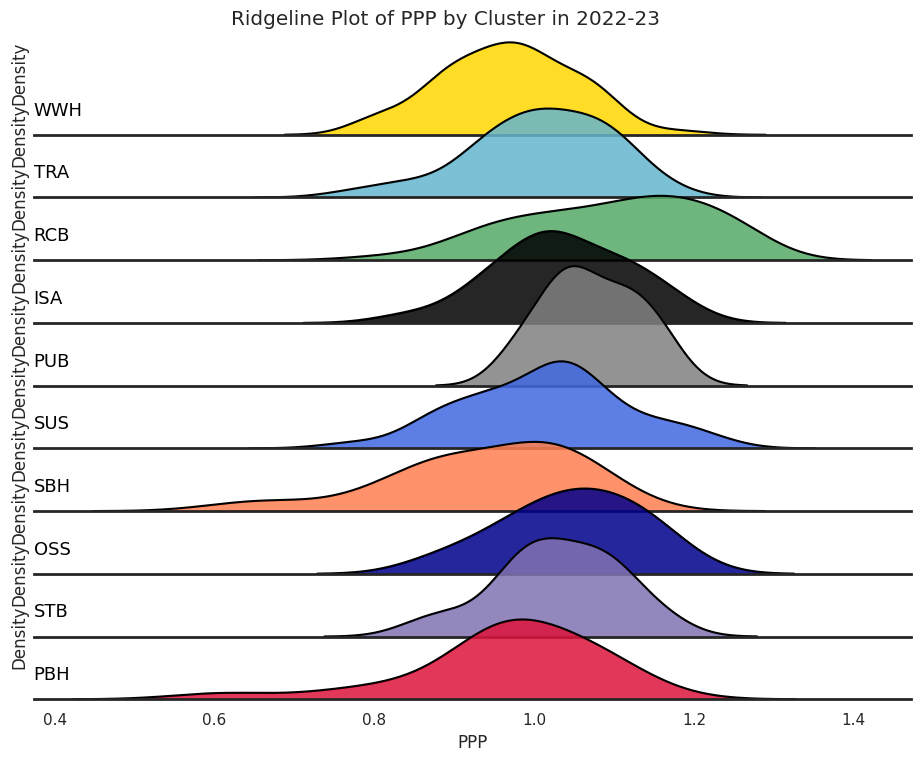

In [48]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 10)
g = sns.FacetGrid(player_PPP_23, palette=colors, row="CLUSTER", hue="CLUSTER", aspect=12, height=0.8)
g.map_dataframe(sns.kdeplot, x="PPP", fill=True, alpha=0.85)
g.map_dataframe(sns.kdeplot, x="PPP", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "CLUSTER")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="PPP")
g.despine( left=True)
plt.suptitle('Ridgeline Plot of PPP by Cluster in 2022-23 ', y=0.95)
